**Tema:** Regresión Lineal Símple y Múltiple con Python

**Autor:** José Luis Higuera Caraveo

**Fecha de creación del documento:** Feb-25-2022

**Copyright:** El presente documento es de dominio público por lo que cualquiera puede disponer del mismo. No se permite lucrar con este.

# Regresión Lineal

## Regresión Lineal Simple

### Hipótesis de la Regresión Lineal

Los problemas de regresión son aquellos que, dado una variable de comportamiento (x) podemos predecir el resultado de una segunda (y).

La regresión Lineal símple se traduce en un sistema lineal donde la hipótesis es:

$$Hypotesis: h_0(x) = \theta_0 + \theta_1 \cdot x$$

donde:

* $h_0(x):$ Es la predicción, es decir la variable y.
* $\theta_0\ y\ \theta_1:$ Son los parámetros que el algoritmo trata de encontrar tales que el error de la predicción sea lo mínimo posible.

### Función de coste

El proceso del algorítmo es, se inicializan los parámetros $\theta_0\ y\ \theta_1$ de manera aleatoria. Por ejemplo:

$$Parametros = [0, 0]$$

El algoritmo procederá a hacer la primera predicción. Para cada valor de la variable $x$, se predice una variable $y$, para diferenciar, llemaremos a esta variable $y$ como $y_{pred}$.

Una vez se tienen todas las predicciones se procede en calcular el costo. La fórmula para calcularlo es la siguiente:

$$J(\theta_0,\ \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_0(x^i) - y^i)^2$$

donde:
* $m$: Es el número de muestras que se estan analizando, o el número de ejemplos.
* $h_0(x^i)$: Es el resultado de la predicción calculada anteriormente, es decir, el valor de la variable $y_{pred}$.

El objetivo final del algoritmo es minimizar $J(\theta_0,\ \theta_1)$ es decir, encontrar los $\theta_0\ y\ \theta_1$ óptimos que minimicen el costo o también llamado pérdida.

Hasta este momento podemos resumir que tenemos:

* Hipótesis: $h_0(x) = \theta_0 + \theta_1 \cdot x$.
* Parámetros: $\theta_0,\ \theta_1$
* Función de costo: $J(\theta_0,\ \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_0(x^i) - y^i)^2$
* Objetivo: $min\ J(\theta_0,\ \theta_1)$

### Descenso del Gradiente

El descenso del gradiente es un algoritmo de optimización que nos ayuda a encontrar el costo mínimo de un problema de regresión.

Para encontrar el mínimo en una ecuación se usa el cálculo multivariable, se aplica las derivadas parciales a la función de coste, respecto a cada parámetro $\theta_0\ y\ \theta_1$. A su vez, se establece una tasa de aprendizaje que ayuda a estar re calculando los parámetros hasta que este converja a un mínimo. En este sentido el algoritmo se expresa de la siguiente manera.

Repetir hasta converger {
    $$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}\ J(\theta_0,\ \theta_1)$$
    $$(Para\ j = 1\ y\ j = 0)$$

}

donde:
* $\alpha$ es la tasa de aprendizaje.

**Derivadas parciales para $\theta_0\ y\ \theta_1$**

$$j = 0\ :\ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)$$
$$j = 1\ :\ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)\cdot x^i$$

Dadas estas derivadas, el algoritmo queda de la siguiente manera:

Repetir hasta converger {
    $$\theta_0 := \theta_0 - \alpha  \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)$$
    $$\theta_1 := \theta_1 - \alpha  \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)\cdot x^i$$
    
* Actualizar $\theta_0$

* Actualizar $\theta_1$


}

### Implementación en código

In [1]:
import time
from IPython.display import clear_output

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

Uno de los dataset por excelencia para comprender el algoritmo de Regresión Lineal es el del precio de las casas de Boston. 

La data está disponible en el siguiente enlace. [Enlace](https://www.kaggle.com/vikrishnan/boston-house-prices)

In [2]:
data = pd.read_csv('../data/housing.csv', header=None, sep='\s+')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vemos que el dataset no tiene columnas, afortunadamente Kaggle nos proporciona el nombre de las mismas para poder añadírselas.

* CRIM: tasa de criminalidad en la zona.
* ZN: proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
* INDUS: proporción de acres comerciales no minoristas por ciudad.
* CHAS: variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario).
* NOX: concentración de óxidos nítricos (partes por 10 millones).
* RM: promedio de cuartos por vivienda.
* EDAD: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* DIS: distancias ponderadas a cinco centros de empleo de Boston.
* RAD: índice de accesibilidad a las carreteras radiales.
* TAX: tasa de impuesto a la propiedad de valor total por $ 10,000.
PTRATIO: proporción de alumnos por maestro por ciudad.
* B: 1000 * (Bk−0.63)2 donde Bk es la proporción de negros por ciudad.
* LSTAT: \% de la población con status inferior.
* MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

In [3]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
          'B', 'LSTAT', 'MEDV']

data.columns = columns
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Se procederá a predecir el precio medio de la vivienda (MEDV) respecto al número de habitaciones que la compone (RM).

In [4]:
# Variables necesarias para el modelo
m = len(data)
x = data['RM']
y = data['MEDV']

In [5]:
# Funcion para calcular y_pred
def get_y_pred(x, theta):
    return theta[0] + theta[1] * x

In [6]:
# Función para calcular el costo
def get_cost(y_pred, y):
    return (np.sum((y_pred - y).dot((y_pred - y).T))) / (2 * m)

In [7]:
# Descenso del gradiente para encontrar los parámetros óptimos
def get_predictions(x, y, n_iter, theta, alpha=0.01):
    for i in range(n_iter):
        # Predecimos y respecto a theta en las iteración i-ésima
        y_pred = get_y_pred(x, theta)
        
        # Calculamos los parámetros theta_0 y theta_1 en la iteración i-ésima
        theta_0 = theta[0] - (alpha * ((np.sum(y_pred - y)) / m))
        theta_1 = theta[1] - (alpha * ((np.sum((y_pred - y) * x)) / m))
        
        theta = [theta_0, theta_1]
        
        # Calculamos el costo respecto a y_pred en las iteración i-ésima 
        cost = get_cost(y_pred, y)
        
        # Hacemos una visualización cada 1000 iteraciones
        if i % 1000 == 0:
            print('Predicción a la iteración {}'.format(i))
            print('Costo a la iteración {}: {}'.format(i, cost))
            print('Theta_0: {}, Theta_1: {}'.format(theta_0, theta_1))
            print('Precio = {} + {} * X'.format(theta_0, theta_1))
            print('\n')
            plt.figure(figsize=(8,8))
            plt.scatter(x, y, label='Datos Reales')
            plt.plot(x, y_pred, color='k', label='Predicción')
            plt.title('Num Habitaciones vs Precio')
            plt.xlabel('Numero de Habitaciones')
            plt.ylabel('Precio en Miles de Dolares')
            plt.legend(loc='best')
            plt.show()
            
            time.sleep(0.1)
            clear_output(wait=True)
            
    # Retornamos los parámetros theta_0 y theta_1 óptimos encontrados
    return theta

Predicción a la iteración 50000
Costo a la iteración 50000: 21.800321736784475
Theta_0: -34.584358797761816, Theta_1: 9.088548160811078
Precio = -34.584358797761816 + 9.088548160811078 * X




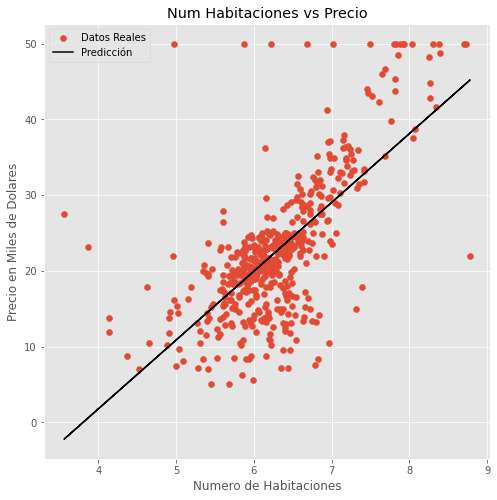

In [8]:
initial_theta = theta = np.array([0,0])
n_inter = 50001

theta_optim = get_predictions(x, y, n_inter, initial_theta)

In [9]:
print(theta_optim)

[-34.584358797761816, 9.088548160811078]


Como se puede observar, el costo se va minimizando en cada iteración, y gracias al algoritmo del descenso del gradiente podemos encontrar los valores de Theta óptimos para la predicción.

### Algoritmo con la librería SK-Learn

No es escalable estar implementando en código el algoritmo cada vez que se necesite, para ello, podemos ayudarnos de librerías como Scikit Learn que ya lo tiene implementado y es muy eficiente. Es así como podemos, en pocas líneas de código, llegar a una solución óptima.

In [10]:
from sklearn.linear_model import LinearRegression

La diferencia es que Sklearn necesita un array de 2 dimensiones para funcionar, por lo que será necesario re escalar la daata.

In [11]:
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [12]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [13]:
# Opteniendo theta_0 y theta_1
theta_0 = model.intercept_
theta_1 = model.coef_
theta_0, theta_1

(array([-34.67062078]), array([[9.10210898]]))

## Regresión Lienal Múltiple

### Hipótesis de la Regresión Lineal Múltiple

El algoritmo de regresión lineal símple puede ser muy útil, pero en ocaciones puede quedarse corto, o para problemas un poco más complejos, pueda que no sea la mejor alternativa para realizar predicciones.

El modelo de regresión lineal múltiple sigue el mismo concepto que el simple, la diferencia es que ahora agregamos más de una variable independiente $x$. Siguiendo este sentido, la hipótesis de este algoritmo queda de la siguiente manera:

$$Hypotesis: h_0(x) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \dots + \theta_n \cdot x_n$$

donde:

* $h_0(x):$ Es la predicción, es decir la variable y.
* $\theta_0, \ \theta_2, \ \dots, \ \theta_n:$ Son los parámetros que el algoritmo trata de encontrar tales que el error de la predicción sea lo mínimo posible.

### Función de coste

La función de costo para este algoritmo es la misma que un modelo lineal, la diferencia es que ahora se tienen que inicializar más parámetros $\theta$, tales que el número de $\theta_s$ es igual a $n+1$, donde $n$ es el total de variables independientes.

$$J(\theta_s) = \frac{1}{2m} \sum_{i=1}^{m}(h_0(x^i) - y^i)^2$$

El objetivo final del algoritmo es minimizar $J(\theta_s)$ es decir, encontrar los $\theta_s$ óptimos que minimicen el costo o también llamado pérdida.

### Descenso del Gradiente

Tomamos como referencia el descenso del gradiente para el modelo lineal, la diferencia es que ahora tenemos que encontrar las parámetros, pero el proceso es el mismo.

Repetir hasta converger {
    $$\theta_0 := \theta_0 - \alpha  \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)$$
    $$\theta_s\ 1-n := \theta_i - \alpha  \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)\cdot x^i$$
    
* Actualizar $\theta_0$

* Actualizar $\theta_s$ del 1 a n


}

### Implementación en código

En este caso de estudio, y para ilustrar como se crea un algoritmo de regresión lineal múltiple, tomaremos el mismo set de datos y agregaremos una variable mas, esta es la variable LSTAT.

Se procede a seleccionar las variables del conjunto de datos.

In [36]:
# Variables independientes
x = data[['RM', 'LSTAT']]

# Variable a predecir y
y = data['MEDV']

m = len(data)

In [37]:
# Agregando una columna de 1 a la variable x
x = x.assign(ones=1)

# Re ordenando para que los unos sean la primera columna
x = x[['ones', 'RM', 'LSTAT']].values
x

array([[1.   , 6.575, 4.98 ],
       [1.   , 6.421, 9.14 ],
       [1.   , 7.185, 4.03 ],
       ...,
       [1.   , 6.976, 5.64 ],
       [1.   , 6.794, 6.48 ],
       [1.   , 6.03 , 7.88 ]])

In [38]:
from mpl_toolkits.mplot3d import *

In [39]:
x1_range = np.arange(data['RM'].min(),data['RM'].max())
x2_range = np.arange(data['LSTAT'].min(),data['LSTAT'].max())

X1, X2 = np.meshgrid(x1_range,x2_range)

In [40]:
def pred_y_multy(x, thetas):
    return x.dot(thetas.T)

In [41]:
def get_cost_multy(y_pred, y):
    return (1 / 2*m) * np.sum((y_pred - y) * (y_pred - y))

In [42]:
def get_gradient_multy(x, y, n_iter, thetas, alpha):
    for i in range(n_iter):
        y_pred = pred_y_multy(x, thetas)
        
        thetas = thetas - (alpha * ((1 / m)*((y_pred - y).T.dot(x))))
        
    return thetas

In [43]:
initial_thetas = np.array([0,0,0])
alpha = 0.001
n_iter = 1000000
thetas = get_gradient_multy(x,y,n_iter, initial_thetas, alpha)

In [44]:
thetas

array([-1.3528106 ,  5.09403207, -0.64241202])

### Algoritmo con Scikit-Learn

En la práctica, aplicar un código desde cero resulta poco escalable, afortunadamente, existen librerias que nos ayudan a obtener resultados de forma rápida y precisa. Scikit-Learn es por excelencia una de las mejores en el ámbito del Machine Learning. Podemos implementar un modelo de regresión múltiple con solo unas pocas líneas de código.

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
X = data[['RM', 'LSTAT']].values
y = data['MEDV'].values.reshape(-1, 1)

slr = LinearRegression()
slr.fit(X, y)

LinearRegression()

In [48]:
coef = slr.coef_
intercept = slr.intercept_

print(intercept, coef)

[-1.35827281] [[ 5.09478798 -0.64235833]]


Los valores que nos da como resultado Scikit-Learn son parecidos a los que se obtuvieron con el algoritmo aplicado en código.
Pero hay que destacar que, Scikit-Learn es más rápido y por ende una mejor solución.

Representar visualmente datos con dos o más características analizadas resulta complicado, en el siguiente gráfico se busca resaltar como los datos son proyectados a una solución dada por el algoritmo. Pero no es la mejor manera de hacerlo.

Lo importante es entender los resultados y tomar decisiones en base a los mismos.

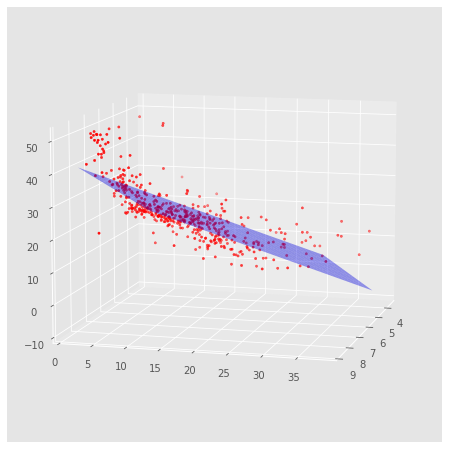

In [52]:
from mpl_toolkits.mplot3d import *
import numpy as np 
x1_range = np.arange(data['RM'].min(),data['RM'].max())
x2_range = np.arange(data['LSTAT'].min(),data['LSTAT'].max())

X1, X2 = np.meshgrid(x1_range,x2_range)

plano = pd.DataFrame({'RM':X1.ravel(), 'LSTAT':X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,pred, alpha=0.4, color='b')

ax.scatter3D(data['RM'], data['LSTAT'], data['MEDV'], color='r', marker='.')
ax.view_init(elev=10, azim=15)
plt.show()